# Football Or Not: Image Classification with FastAI

This notebook demonstrates how to build a simple image classifier to distinguish between football and basketball images using FastAI.  
We will download images, preprocess them, train a deep learning model, and visualize results.

In [ ]:
# Import all required libraries for image download, processing, and model training
from duckduckgo_search import DDGS
from fastcore.all import *
from fastdownload import download_url
from fastai.vision.all import *
import time

## Define Image Search Function
We use DuckDuckGo to search and collect image URLs for our classes.

In [ ]:
# Function to search image URLs using DuckDuckGo
def search_images(keywords, max_images=200):
    """
    Search for image URLs using DuckDuckGo.
    Args:
        keywords (str): Search query.
        max_images (int): Maximum number of images to retrieve.
    Returns:
        list: List of image URLs.
    """
    return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')

## Download and Display Sample Images
Let's download and preview one image from each category to verify our search works.

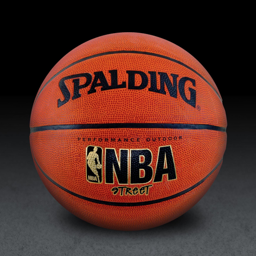

In [ ]:
# Download and show a sample football image into img/football
urls = search_images('football', max_images=1)
dest = 'img/football/football_sample.jpg'
download_url(urls[0], dest, show_progress=False)
Image.open(dest).to_thumb(256, 256)

# Download and show a sample basketball image into img/basketball
basket_url = search_images('basketball', max_images=1)[0]
basket_dest = 'img/basketball/basketball_sample.jpg'
download_url(basket_url, basket_dest, show_progress=False)
Image.open(basket_dest).to_thumb(256, 256)

## Download and Organize Dataset
We will download multiple images for each class and organize them into folders.

In [ ]:
# Set the path to the new img folder
path = Path('img')
# Define the new target folders inside img/
searches = {
    'football': Path('img/football'),
    'basketball': Path('img/basketball')
}
import time

for label, folder in searches.items():
    folder.mkdir(exist_ok=True, parents=True)
    try:
        download_images(folder, urls=search_images(f'{label} photo', max_images=8))
    except Exception as e:
        print(f"Error downloading {label} images: {e}")
        print("Try rerunning this cell after waiting 30-60 minutes.")
    time.sleep(20)  # Increase wait time
    resize_images(folder, max_size=400)

KeyboardInterrupt: 

## Data Cleaning
Remove any images that cannot be opened (corrupted or unreadable files).

In [ ]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)

(#0) []

## Data Preparation
Create a FastAI DataBlock for loading and transforming the images.

In [ ]:
# Set the path to the new img folder
path = Path('img')

# DataBlock for img/football and img/basketball
dls2 = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(0.2, seed=46),
    get_y=parent_label,
    item_tfms=Resize(192)
).dataloaders(path, bs=8)



## Model Training
Train a ResNet18 model on our dataset and evaluate its performance.

In [ ]:
# Create and train a model using ResNet18
learn2 = vision_learner(dls2, resnet18, metrics=error_rate)
learn2.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.464622,0.460255,0.222222,00:07


epoch,train_loss,valid_loss,error_rate,time
0,0.767397,0.199210,0.111111,00:06
1,0.588911,0.123124,0.111111,00:06
2,0.405214,0.164686,0.111111,00:06


## Results Visualization
Visualize the model's predictions on a batch of images.

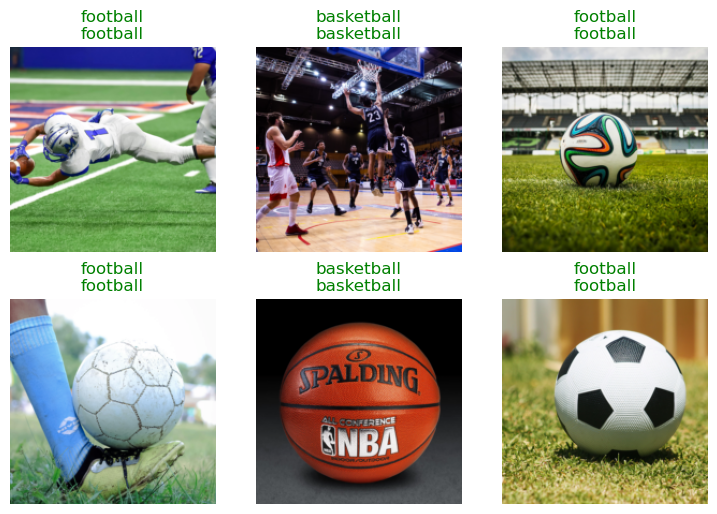

In [ ]:
# Show predictions on a batch of images
learn2.show_results(max_n=18)

## Conclusion

We have successfully built an image classifier that distinguishes between football and basketball images using FastAI.  
You can further improve this project by collecting more data, tuning hyperparameters, or trying different model architectures.